In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context(context = 'poster')

# Exploratory Analysis for POP fMRI DCM Data

In [29]:
# Reading DCM paramter matrices for ModelTwo
a = pd.read_table('./data/DCMmodelTwo_data_A.txt') # intrinsic connectivity
b = pd.read_table('./data/DCMmodelTwo_data_B.txt') # modulatory effects of drive on connection
c = pd.read_table('./data/DCMmodelTwo_data_C.txt') # drives to regions

# Reading DDM parameters for behavioral data
ddm = pd.read_csv('./data/POP_model3-2_VAT_params.csv')

# Reading WMC measures
wmc = pd.read_csv('./data/POP_id_wm.csv')

In [30]:
# Previewing df content
a.head()
b.head()
c.head()

ddm.head()

wmc.head()

,Subject,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,IFG_RH-to-PP_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-GPI_RH,STN_RH-to-GPI_RH
0,16048,-0.394376,-0.035839,-0.047373,0.508810,0.085592,0.014293,0.017779
1,16050,0.459716,0.219120,0.987539,0.079544,0.170257,0.064305,0.384700
2,16052,0.047106,-0.423629,0.068872,0.188866,-0.334126,0.378965,-0.127308
3,16053,-0.278355,0.120758,-0.760646,-2.419510,0.421762,-0.049362,0.414375
4,16054,-0.204698,-0.292952,-0.326387,0.111366,0.141163,0.070962,0.065708


,Subject,GPI_RH-to-IFG_RH-by-Pro_Inc_Arrows,STN_RH-to-GPI_RH-by-Rea_Inc_Arrow,IFG_RH-to-CAUD_RH-by-Inc_Cues
0,16048,0.036534,0.016744,-0.103180
1,16050,-0.071571,0.004877,-0.018681
2,16052,1.597131,-0.020731,0.471772
3,16053,-0.477110,0.368139,-0.662014
4,16054,0.168184,0.268987,-0.320250


,Subject,Cues-to-IFG_RH,Arrows-to-PP_RH
0,16048,-0.094553,0.103676
1,16050,0.179527,1.828018
2,16052,-1.145959,2.309216
3,16053,-0.486152,1.848460
4,16054,-0.923365,2.769132


,Subject,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
0,16048,2.043445,1.732318,2.701031,1.955916,2.799350,2.734599,2.397028,1.998680,0.291099,0.401819
1,16050,1.192783,3.417405,1.792829,3.208320,1.480833,3.786338,1.382813,2.143612,0.245273,0.267914
2,16051,1.005285,4.896075,1.333776,3.951237,1.257180,3.057926,1.737084,3.499277,0.233655,0.259014
3,16052,1.804825,3.283169,1.800410,3.257707,1.712263,3.587484,2.436187,3.393481,0.219707,0.265498
4,16053,1.427812,3.855500,1.552936,3.894774,1.434788,3.507232,1.793490,3.629197,0.246711,0.320006


,Subject,ospan
0,16048,21
1,16050,68
2,16051,59
3,16052,75
4,16053,23


## 1. Intrinsic Connectivity and WMC

In [54]:
aMelt = a.melt(id_vars=['Subject'])

aWMC = aMelt.merge(wmc, on='Subject')
aWMC.head(10)

,Subject,variable,value,ospan
0,16048,IFG_RH-to-CAUD_RH,-0.394376,21
1,16048,IFG_RH-to-PUT_RH,-0.035839,21
2,16048,IFG_RH-to-STN_RH,-0.047373,21
3,16048,IFG_RH-to-PP_RH,0.508810,21
4,16048,CAUD_RH-to-GPI_RH,0.085592,21
5,16048,PUT_RH-to-GPI_RH,0.014293,21
6,16048,STN_RH-to-GPI_RH,0.017779,21
7,16050,IFG_RH-to-CAUD_RH,0.459716,68
8,16050,IFG_RH-to-PUT_RH,0.219120,68
9,16050,IFG_RH-to-STN_RH,0.987539,68


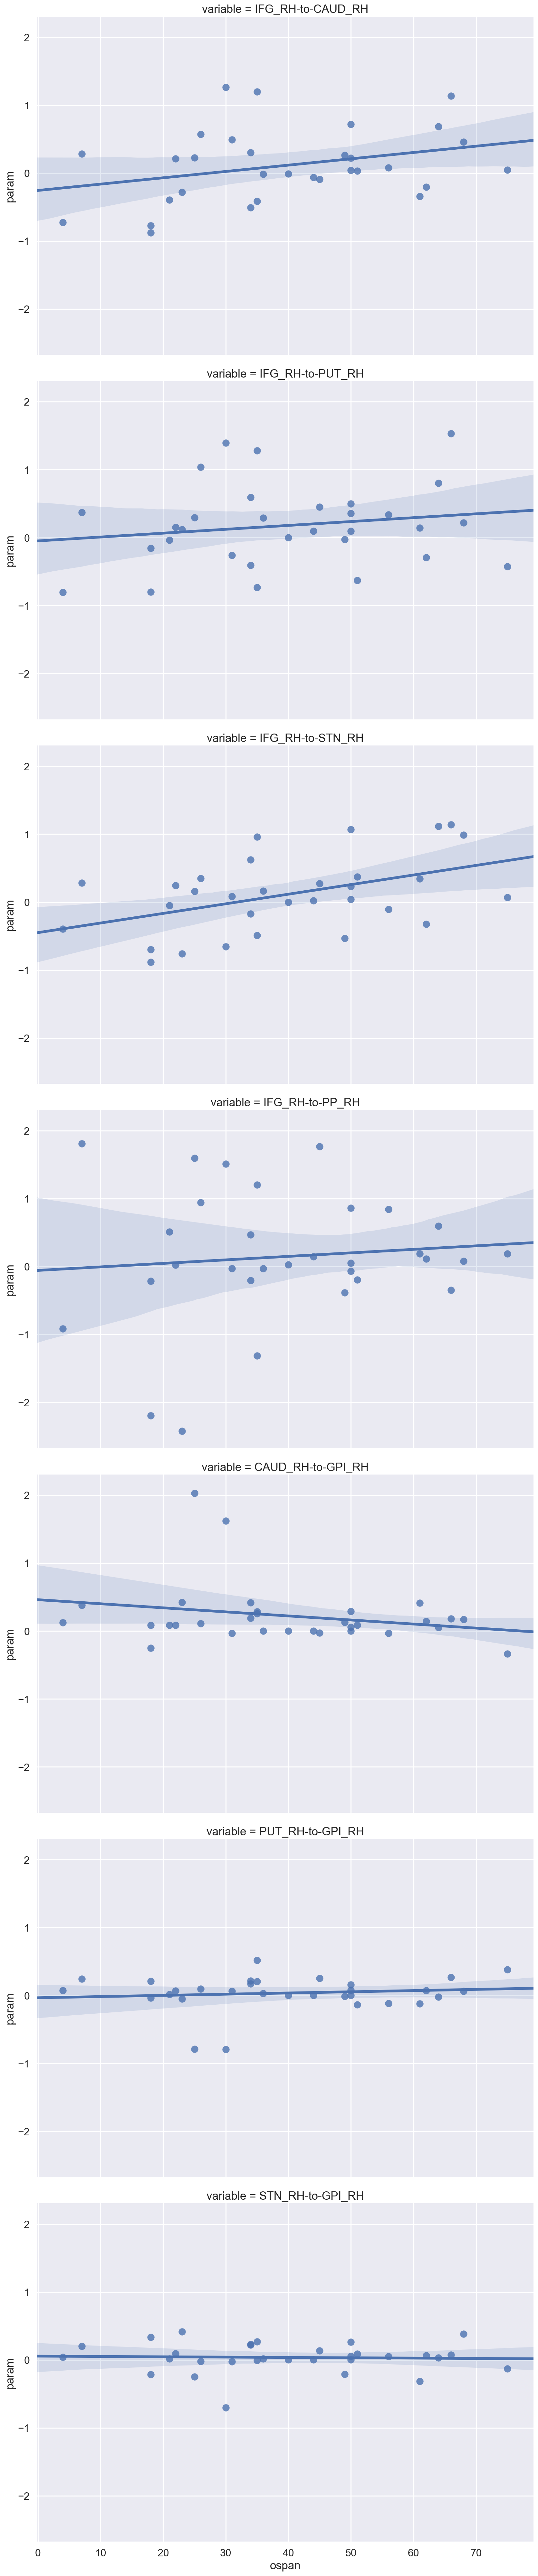

In [107]:
fig = sns.lmplot(x='ospan', 
                 y='value', 
                 row='variable', 
                 data=aWMC, 
                 size=8, 
                 aspect=1.5)

fig.set_ylabels(label='param')

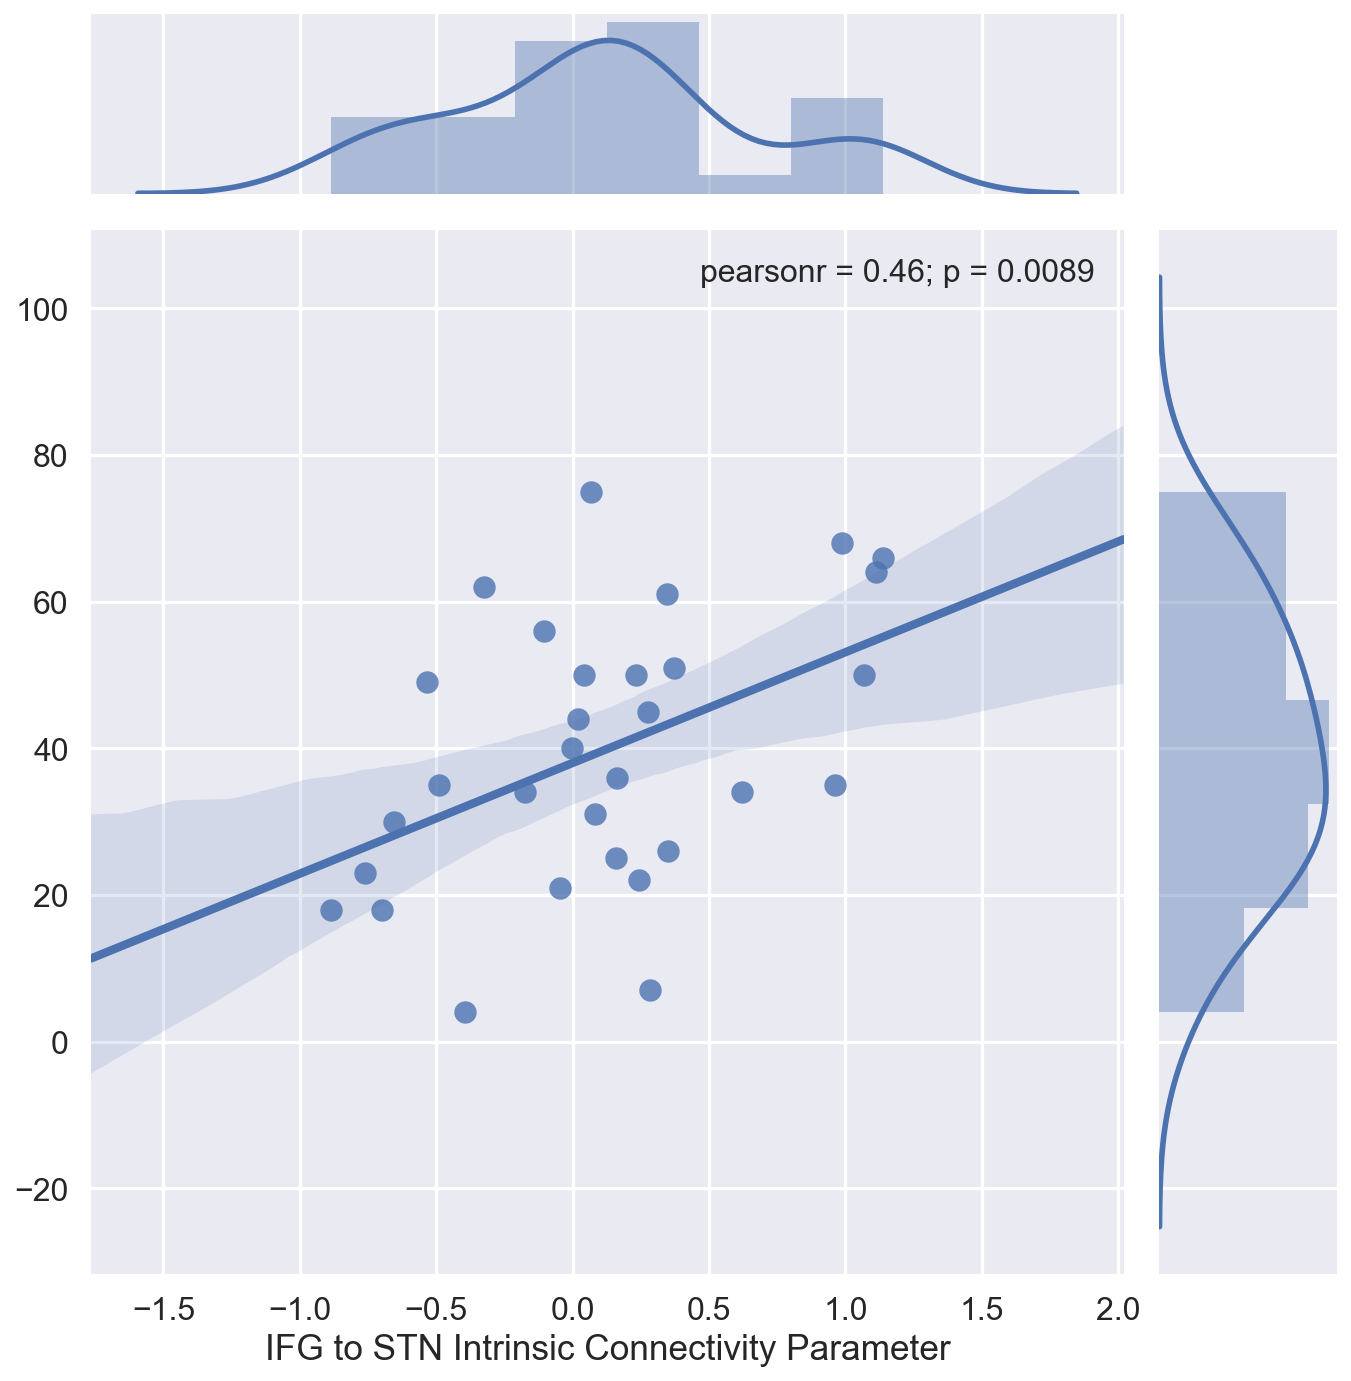

In [109]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=aWMC[aWMC['variable'] == 'IFG_RH-to-STN_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='IFG to STN Intrinsic Connectivity Parameter')

## 2. Intrinsic Connectivity and DDM

In [84]:
aDDM = a.merge(ddm.melt(id_vars='Subject'), on='Subject')
aDDM.head()

,Subject,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,IFG_RH-to-PP_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-GPI_RH,STN_RH-to-GPI_RH,variable,value
0,16048,-0.394376,-0.035839,-0.047373,0.50881,0.085592,0.014293,0.017779,a_Cc_mean,2.043445
1,16048,-0.394376,-0.035839,-0.047373,0.50881,0.085592,0.014293,0.017779,v_Cc_mean,1.732318
2,16048,-0.394376,-0.035839,-0.047373,0.50881,0.085592,0.014293,0.017779,a_Ci_mean,2.701031
3,16048,-0.394376,-0.035839,-0.047373,0.50881,0.085592,0.014293,0.017779,v_Ci_mean,1.955916
4,16048,-0.394376,-0.035839,-0.047373,0.50881,0.085592,0.014293,0.017779,a_NCc_mean,2.799350


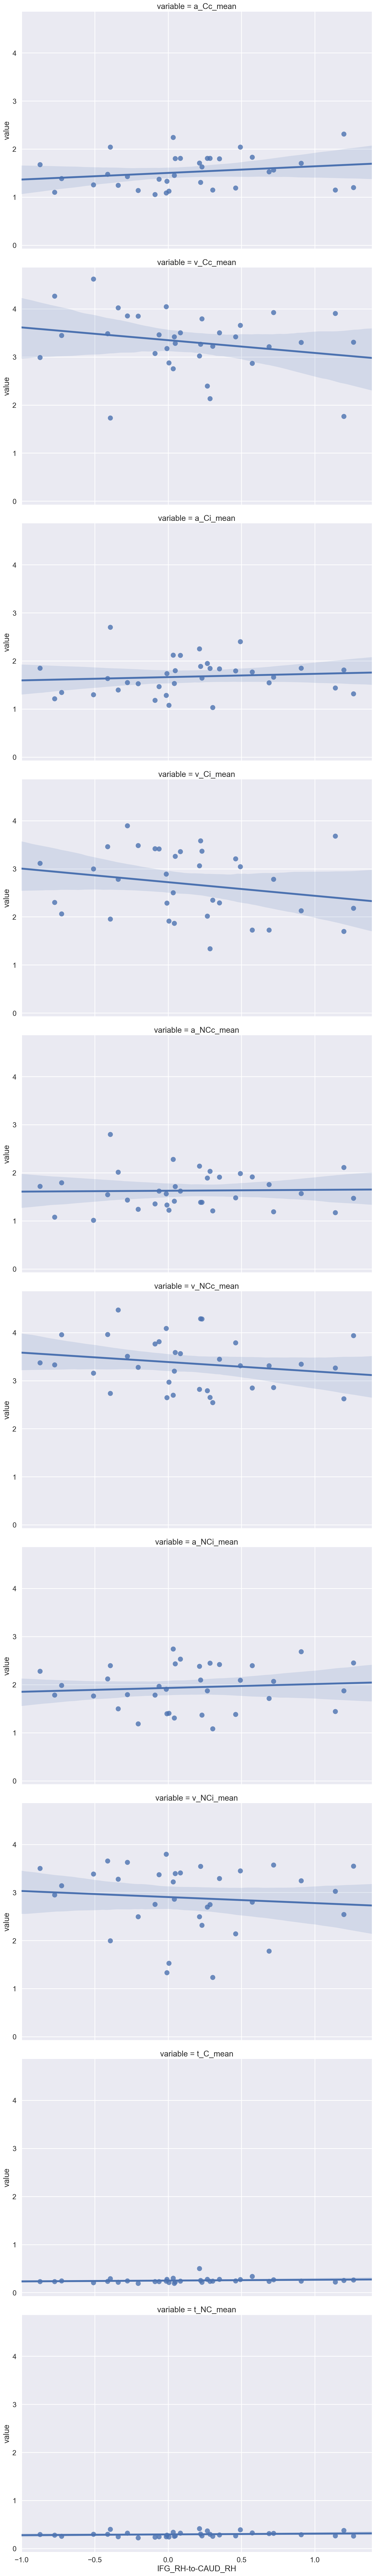

In [105]:
sns.lmplot(x='IFG_RH-to-CAUD_RH', y='value', data=aDDM, row='variable', size=8, aspect=1.5)

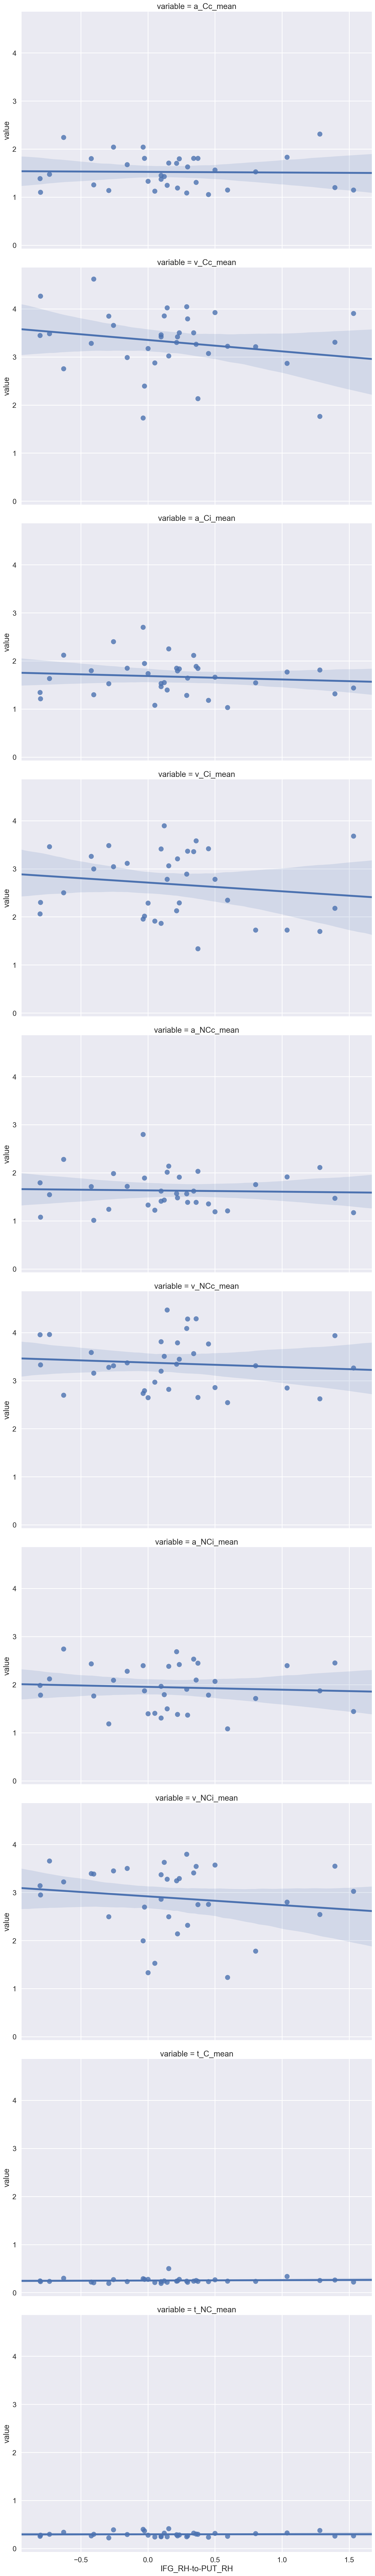

In [106]:
sns.lmplot(x='IFG_RH-to-PUT_RH', y='value', data=aDDM, row='variable', size=8, aspect=1.5)